In [30]:
import sklearn
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
print('cell complete')

cell complete


In [31]:
print('cell')
train_data = pd.read_csv('xad.csv')
test_data = pd.read_csv('train.csv')
print(train_data.head())

cell
   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   681   PAYMENT    1544.15  C1398402934      140180.00       138635.85   
1   681  CASH_OUT    2981.96  C1834592362       96110.00        93128.04   
2   681   PAYMENT    6883.58    C31499849       93128.04        86244.46   
3   681  CASH_OUT  581379.97  C1043232412       21294.00            0.00   
4   681  CASH_OUT  236356.44   C513053643       56820.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M2033933574            0.00            0.00        0               0  
1   C852437627       192881.10       195863.06        0               0  
2   M492755804            0.00            0.00        0               0  
3  C1451660934            0.00       581379.97        0               0  
4  C1513761394       759608.51       995964.95        0               0  


In [32]:
fraud_count = train_data['isFraud'].value_counts()
print('Fraudulant payments',fraud_count[1])
print('Non Fraudulant payments',fraud_count[0])
ratio = fraud_count[0]/fraud_count[1]
print('Class imbalance ratio',ratio,':1')

print('cell complete')

Fraudulant payments 712
Non Fraudulant payments 61909
Class imbalance ratio 86.95084269662921 :1
cell complete


In [33]:


def random_undersampling(df, ratio=1.2, target_column='isFraud'):
    # Determine the class with fewer instances
    minority_class = 1 if sum(df[target_column] == 1) < sum(df[target_column] == 0) else 0
    
    # Calculate the number of samples to keep from the majority class
    num_minority_samples = sum(df[target_column] == minority_class)
    num_majority_samples = int(num_minority_samples * ratio)
    
    # Identify indices of majority class samples
    majority_indices = df.index[df[target_column] == 1 - minority_class]
    
    # Randomly select majority class samples to keep
    selected_majority_indices = np.random.choice(majority_indices, num_majority_samples, replace=False)
    
    # Combine indices of minority class and selected majority class samples
    indices_to_keep = np.concatenate((df.index[df[target_column] == minority_class], selected_majority_indices))
    
    # Return the undersampled data
    return df.iloc[indices_to_keep]

# Assuming df is your DataFrame containing the data
undersampled_data = random_undersampling(train_data, ratio=1.2)
train_data = undersampled_data
print('cell complete')

train_data = pd.DataFrame(undersampled_data, columns=['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'])

cell complete


In [34]:
print('after  undersampling')
fraud_count = train_data['isFraud'].value_counts()
print('Fraudulant payments',fraud_count[1])
print('Non Fraudulant payments',fraud_count[0])
ratio = fraud_count[0]/fraud_count[1]
print('Class imbalance ratio',ratio,':1')

print('cell complete')

after  undersampling
Fraudulant payments 712
Non Fraudulant payments 854
Class imbalance ratio 1.199438202247191 :1
cell complete


In [35]:
from sklearn.model_selection import train_test_split

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are features and target for training and testing respectively
X_train = train_data  # Assuming 'isFraud' is the target column
y_train = train_data['isFraud']
X_test = test_data
y_test = test_data['isFraud']

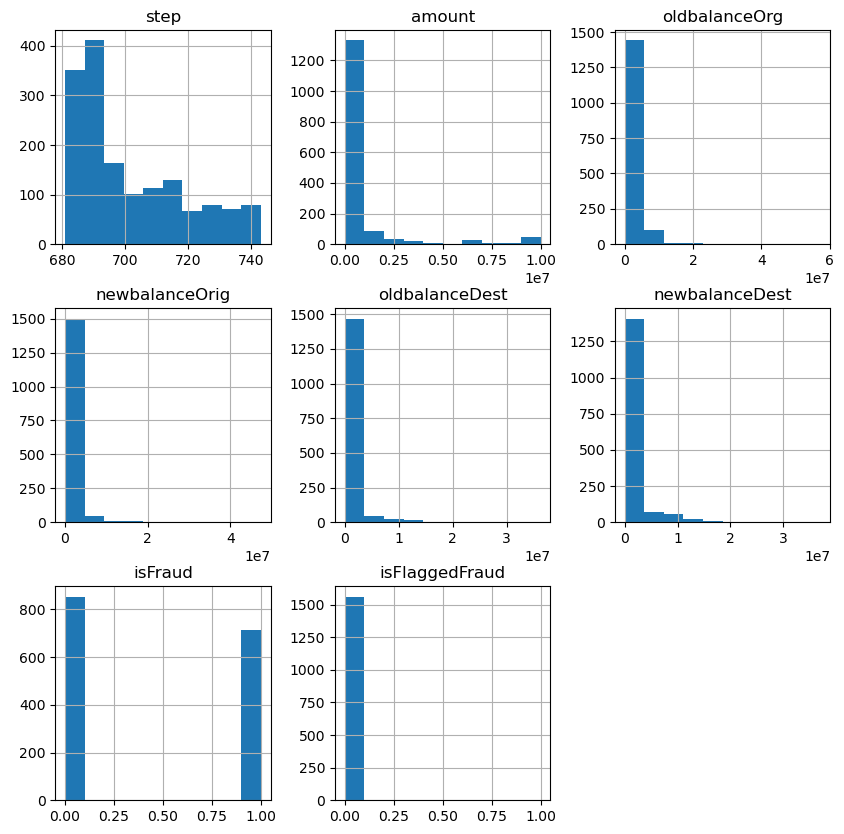

cell complete


In [36]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
train_data.hist(figsize=(10, 10))
plt.show()

print('cell complete')

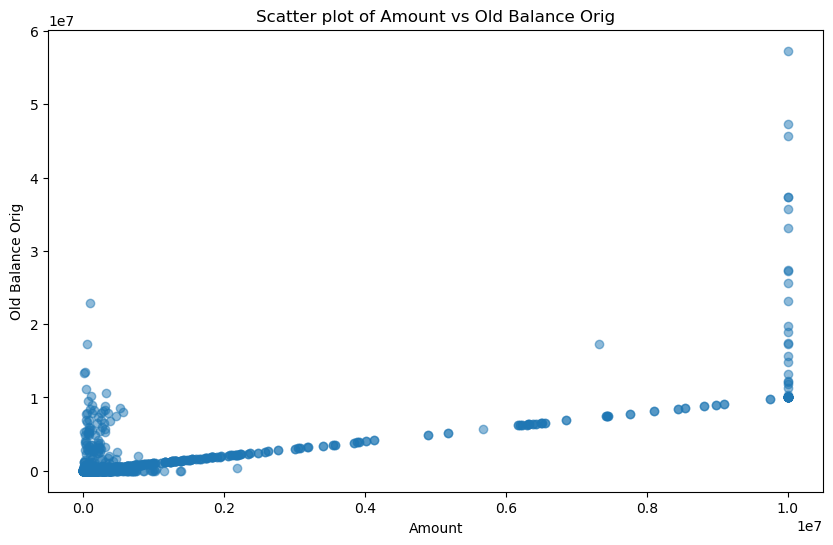

In [37]:
data_encoded = pd.get_dummies(train_data, columns=['step', 'type', 'nameOrig', 'nameDest'])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_data['amount'], train_data['oldbalanceOrg'], alpha=0.5)
plt.title('Scatter plot of Amount vs Old Balance Orig')
plt.xlabel('Amount')
plt.ylabel('Old Balance Orig')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

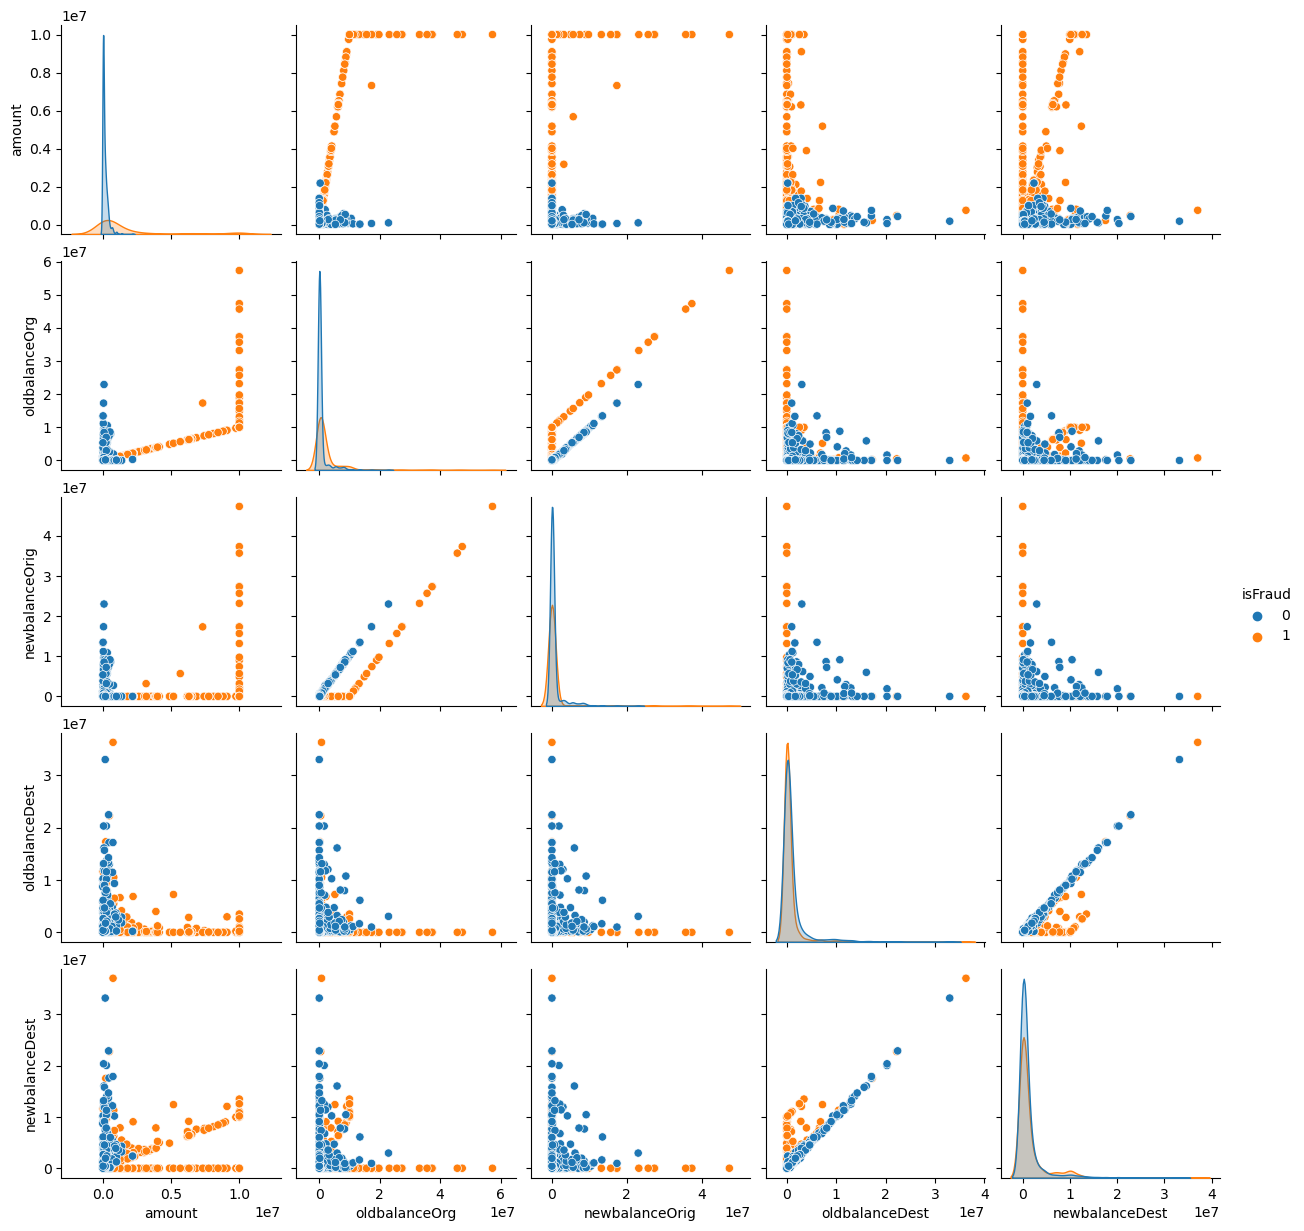

cell complete


In [38]:
import seaborn as sns

sns.pairplot(train_data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']], hue='isFraud')
plt.show()

print('cell complete')

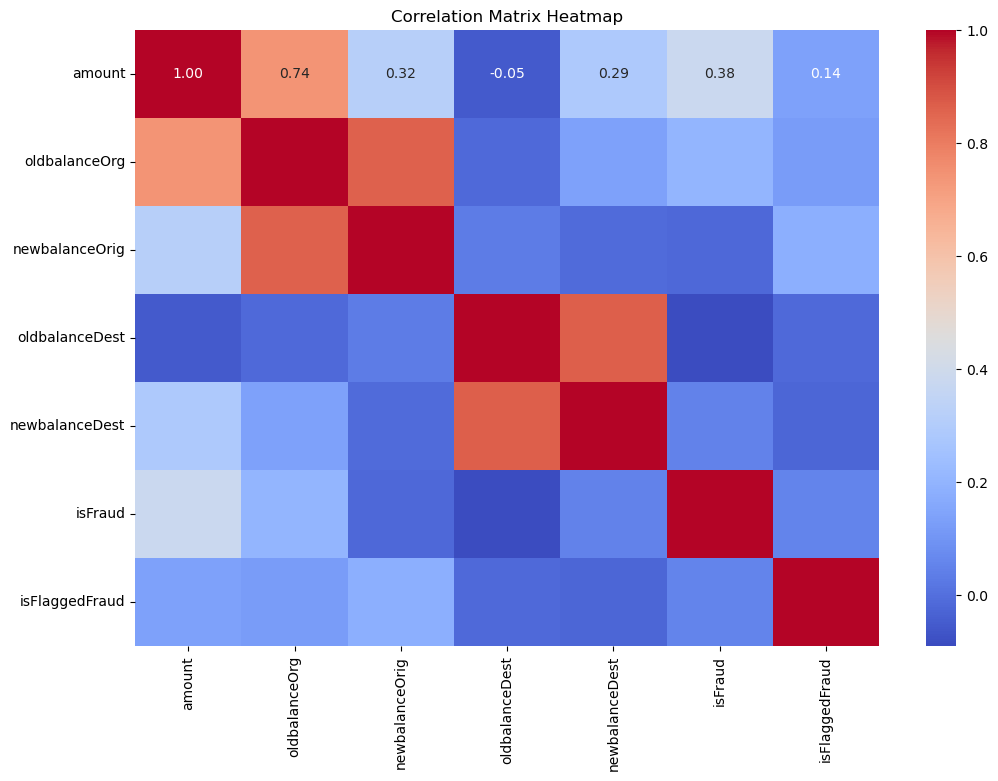

cell complete


In [39]:
# Convert categorical columns using one-hot encoding
data_encoded = pd.get_dummies(train_data, columns=['type', 'step'])

# Select only numeric columns for the heatmap
numeric_data = data_encoded.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

print('cell complete')

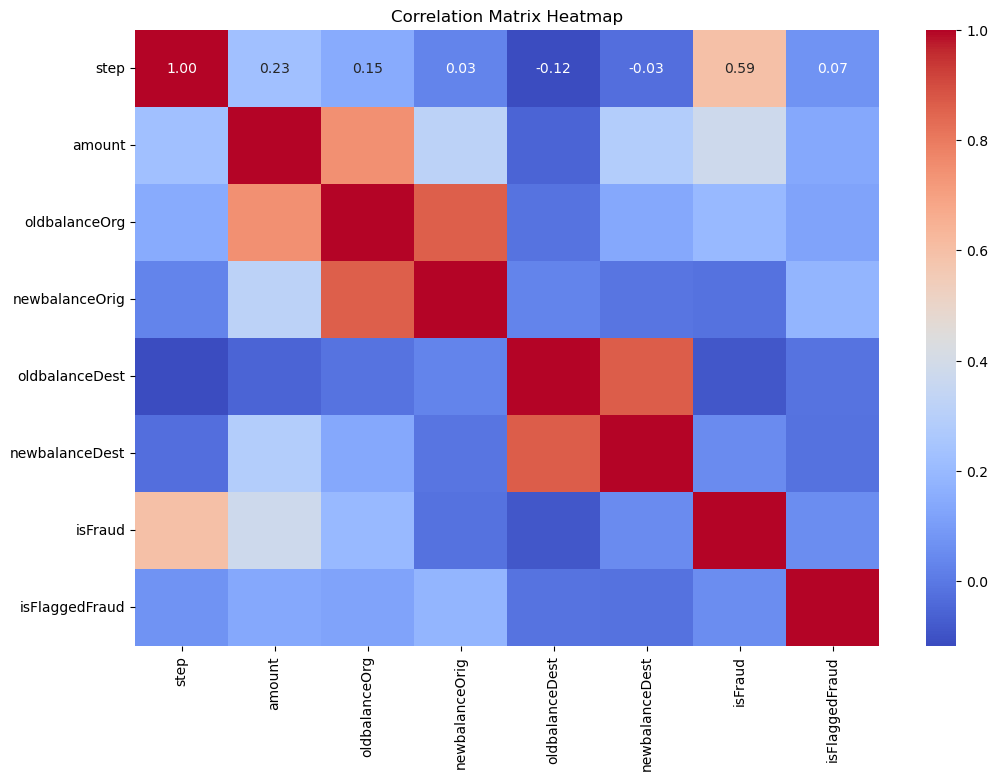

cell complete


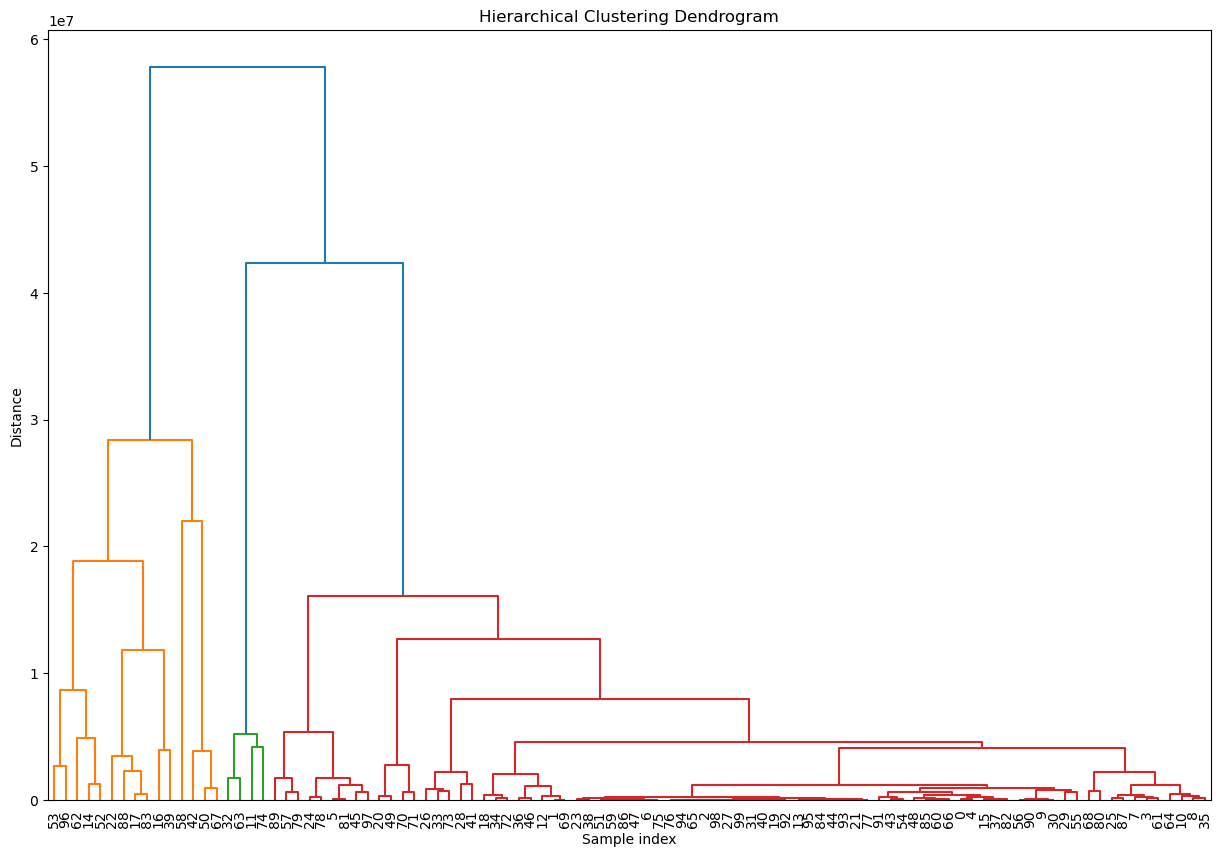

cell complete


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer

# Assuming train_data is already defined

# Convert categorical columns using one-hot encoding
data_encoded = pd.get_dummies(train_data, columns=['type', 'nameOrig', 'nameDest'])

# Select only numeric columns for the heatmap
numeric_data = data_encoded.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

print('cell complete')

# Sample a subset of the data for visualization
sample_data = data_encoded.sample(n=100, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
sample_data_imputed = imputer.fit_transform(sample_data)

# Perform hierarchical/agglomerative clustering on the imputed data
Z = linkage(sample_data_imputed, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

print('cell complete')

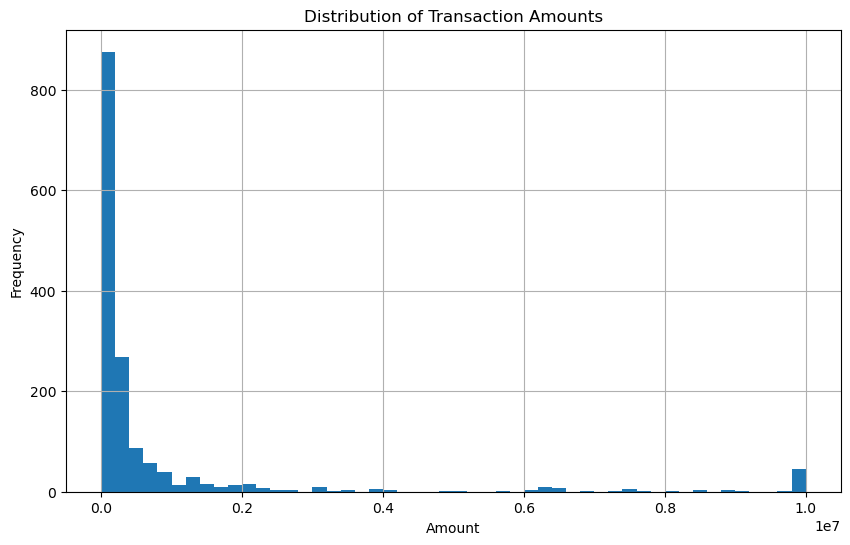

cell complete


In [41]:
plt.figure(figsize=(10, 6))
train_data['amount'].hist(bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
print('cell complete')

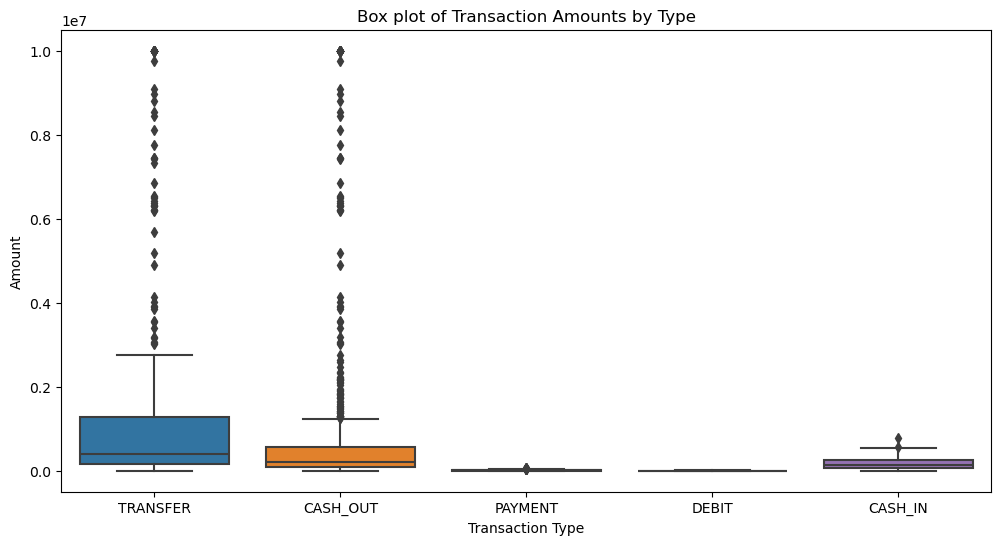

cell complete


In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', data=train_data)
plt.title('Box plot of Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()
print('cell complete')

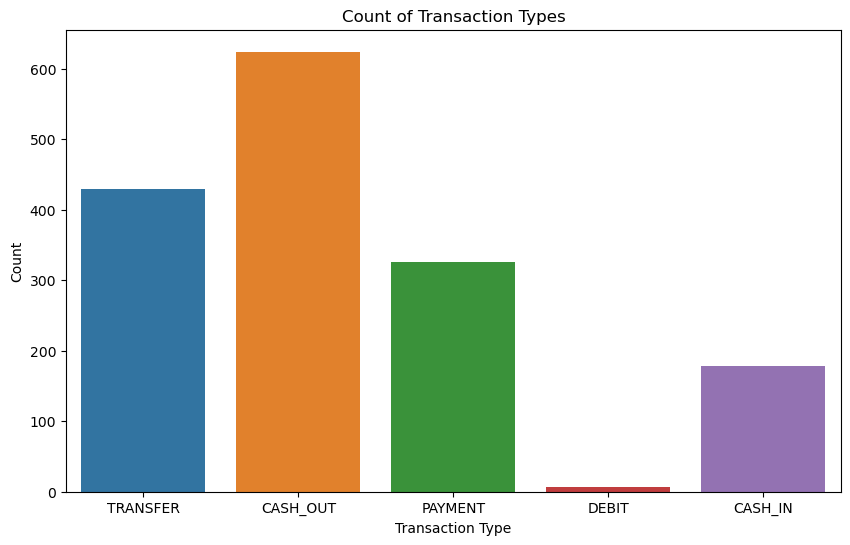

cell complete


In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=train_data)
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()
print('cell complete')

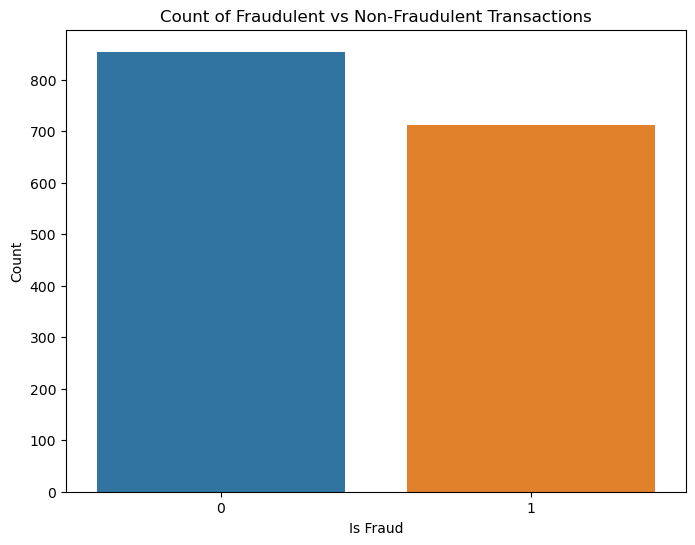

cell complete


In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=train_data)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()
print('cell complete')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

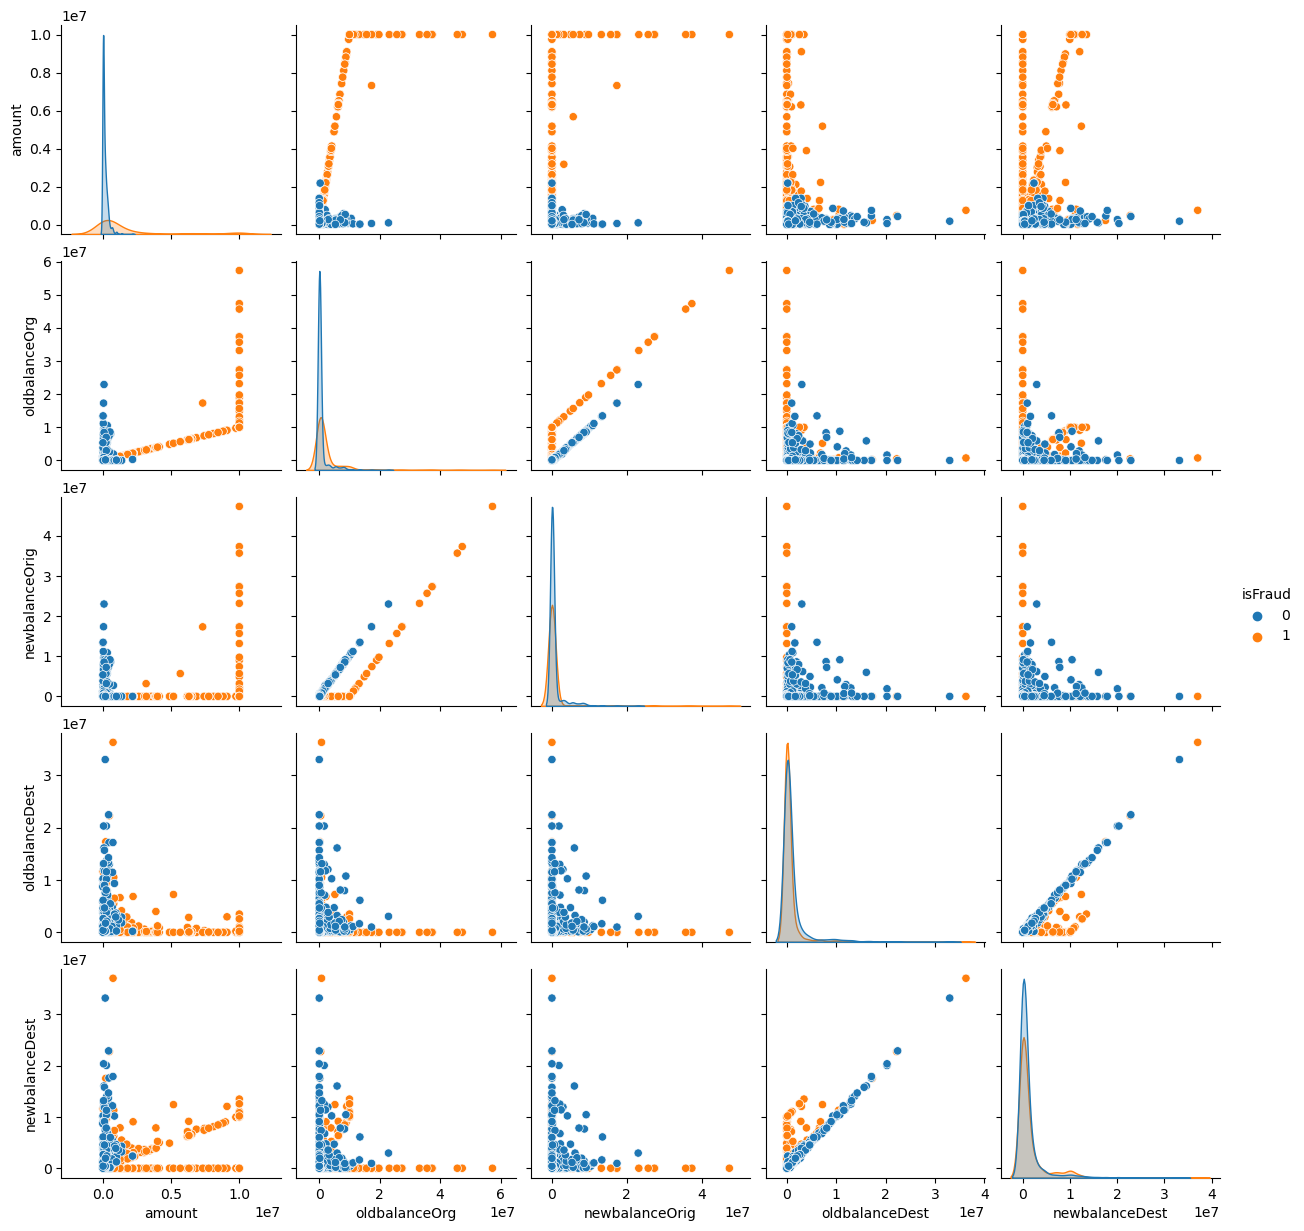

cell complete


In [45]:
sns.pairplot(train_data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']], hue='isFraud')
plt.show()

print('cell complete')

In [46]:

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test_transformed)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

NameError: name 'model_lr' is not defined

In [ ]:
print('Randome Forest')

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100)  # Adjust hyperparameters as needed
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_lr:.4f}")  # Typo fixed from previous code
print(f"F1-score: {f1_rf:.4f}")
print("-" * 50)


In [22]:
# print('xgboost')

# from sklearn.svm import SVC

# # Train the SVM model
# model_svm = SVC(kernel='linear')  # Choose a suitable kernel
# model_svm.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_svm = model_svm.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# precision_svm = precision_score(y_test, y_pred_svm)
# recall_svm = recall_score(y_test, y_pred_svm)
# f1_svm = f1_score(y_test, y_pred_svm)

# print("Support Vector Machine (SVM) Performance:")
# print(f"Accuracy: {accuracy_svm:.4f}")
# print(f"Precision: {precision_svm:.4f}")
# print(f"Recall: {recall_svm:.4f}")
# print(f"F1-score: {f1_svm:.4f}")
# print("-" * 50)


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Train the XGBoost model with hyperparameter tuning (adjust as needed)
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                          objective='binary:logistic', subsample=0.8, colsample_bytree=0.8,
                          eval_metric='auc')  # Use AUC for imbalanced classes
model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)  # Calculate AUC

print("XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")
print(f"AUC: {auc_xgb:.4f}")  # Print AUC
print("-" * 50)


C:\Users\Reach\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.52052
[1]	validation_0-auc:0.54717
[2]	validation_0-auc:0.54717
[3]	validation_0-auc:0.54717
[4]	validation_0-auc:0.54716
[5]	validation_0-auc:0.71085
[6]	validation_0-auc:0.71137
[7]	validation_0-auc:0.70600
[8]	validation_0-auc:0.85805
[9]	validation_0-auc:0.86499
[10]	validation_0-auc:0.86646
[11]	validation_0-auc:0.86613
[12]	validation_0-auc:0.86663
[13]	validation_0-auc:0.86674
[14]	validation_0-auc:0.86695
[15]	validation_0-auc:0.86660
[16]	validation_0-auc:0.86689
[17]	validation_0-auc:0.97388
[18]	validation_0-auc:0.97383
[19]	validation_0-auc:0.98153
[20]	validation_0-auc:0.98142
[21]	validation_0-auc:0.98022
[22]	validation_0-auc:0.98478
[23]	validation_0-auc:0.98566
[24]	validation_0-auc:0.98442
[25]	validation_0-auc:0.98375
[26]	validation_0-auc:0.98759
[27]	validation_0-auc:0.98984
[28]	validation_0-auc:0.99037
[29]	validation_0-auc:0.98977
[30]	validation_0-auc:0.99159
[31]	validation_0-auc:0.99136
[32]	validation_0-auc:0.99318
[33]	validation_0-au